In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv("../data/raw/IPO_correct.csv")

In [6]:
df.head()

,IPO Name,Issue Open Date,Issue Close Date,Listing Date,Listing Exchange,Issue Price (Rs),Listing Price (Rs),Listing Gain (%),GMP,Retail Subscription,NII Subscription,QIB Subscription,Issue Size (Rs.cr),Revenue (Rs),Profit (Rs),EPS,Promoter Holding (%),Lead Manager,Label
0,Narayana Hrudayalaya Ltd. IPO,12/17/2015,12/21/2015,1/6/2016,"BSE, NSE",250,291.0,16.40,41.0,1.89,3.62,24.43,613.08,1373.19,-12.11,Negative,35.09,Axis Bank,NaN
1,Alkem Laboratories Ltd. IPO,12/8/2015,12/10/2015,12/23/2015,"BSE, NSE",1050,1380.0,31.43,330.0,4.24,61.28,63.56,"1,347.76",3964.2,460.75,38.54,53.8,Axis Capital,NaN
2,Dr.Lal PathLabs Ltd. IPO,12/8/2015,12/10/2015,12/23/2015,"BSE, NSE",550,720.0,30.91,170.0,3.17,129.96,57.19,631.91,660,94,11.48,58.7,Citigroup Global,NaN
3,S H Kelkar & Co.Ltd. IPO,10/28/2015,10/30/2015,11/16/2015,"BSE, NSE",180,222.0,23.33,42.0,1.98,87.38,25.55,508.17,832.41,63.88,5.34,71.72,JM Financial,NaN
4,InterGlobe Aviation Ltd. IPO,10/27/2015,10/29/2015,11/10/2015,"BSE, NSE",765,856.0,11.90,91.0,0.92,3.57,17.8,"3,017.14",13924.47,1295.58,NaN,85.9,Barclays Securities,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IPO Name              409 non-null    object 
 1   Issue Open Date       409 non-null    object 
 2   Issue Close Date      409 non-null    object 
 3   Listing Date          409 non-null    object 
 4   Listing Exchange      409 non-null    object 
 5   Issue Price (Rs)      409 non-null    int64  
 6   Listing Price (Rs)    409 non-null    float64
 7   Listing Gain (%)      409 non-null    float64
 8   GMP                   409 non-null    float64
 9   Retail Subscription   409 non-null    float64
 10  NII Subscription      409 non-null    float64
 11  QIB Subscription      409 non-null    object 
 12  Issue Size (Rs.cr)    409 non-null    object 
 13  Revenue (Rs)          409 non-null    object 
 14  Profit (Rs)           409 non-null    object 
 15  EPS                   3

In [8]:
df.describe()

,Issue Price (Rs),Listing Price (Rs),Listing Gain (%),GMP,Retail Subscription,NII Subscription,Label
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,0.0
mean,419.171149,499.299927,19.492103,80.128778,16.433716,86.888802,NaN
std,328.216967,433.020094,36.212588,182.878286,28.706422,148.869682,NaN
min,19.000000,19.000000,-90.000000,-388.800000,0.030000,0.030000,NaN
25%,180.000000,205.000000,0.000000,0.000000,2.010000,2.450000,NaN
50%,326.000000,367.000000,6.980000,18.000000,6.470000,22.250000,NaN
75%,575.000000,661.000000,29.330000,85.000000,16.550000,102.700000,NaN
max,2150.000000,2760.000000,249.690000,1117.500000,236.530000,958.070000,NaN


In [9]:
df.isna().sum().sort_values(ascending=False)


Label                   409
EPS                      14
Promoter Holding (%)      7
Issue Close Date          0
Issue Open Date           0
IPO Name                  0
Listing Date              0
Listing Gain (%)          0
Listing Exchange          0
Issue Price (Rs)          0
Listing Price (Rs)        0
NII Subscription          0
Retail Subscription       0
GMP                       0
QIB Subscription          0
Profit (Rs)               0
Revenue (Rs)              0
Issue Size (Rs.cr)        0
Lead Manager              0
dtype: int64

In [11]:
df['IPO Name'].nunique(), df['Issue Open Date'].unique()


(409,
 array(['12/17/2015', '12/8/2015', '10/28/2015', '10/27/2015',
        '10/14/2015', '8/31/2015', '8/28/2015', '8/25/2015', '8/24/2015',
        '8/7/2015', '7/27/2015', '6/24/2015', '5/8/2015', '4/28/2015',
        '4/21/2015', '4/15/2015', '3/18/2015', '3/10/2015', '3/3/2015',
        '12/6/2016', '11/29/2016', '10/26/2016', '10/25/2016', '10/5/2016',
        '9/22/2016', '9/19/2016', '9/14/2016', '9/12/2016', '8/19/2016',
        '8/2/2016', '8/1/2016', '7/20/2016', '7/11/2016', '6/29/2016',
        '6/21/2016', '5/4/2016', '4/28/2016', '4/27/2016', '4/5/2016',
        '3/21/2016', '3/18/2016', '3/16/2016', '2/8/2016', '2/2/2016',
        '1/27/2016', '12/15/2017', '12/6/2017', '12/5/2017', '11/7/2017',
        '11/2/2017', '11/1/2017', '10/31/2017', '10/25/2017', '10/11/2017',
        '10/9/2017', '10/6/2017', '10/4/2017', '9/22/2017', '9/20/2017',
        '9/15/2017', '9/13/2017', '9/11/2017', '9/6/2017', '8/22/2017',
        '8/1/2017', '7/31/2017', '7/12/2017', '6/28/2017'

In [12]:
df['Issue Open Date'] = pd.to_datetime(df['Issue Open Date'], errors='coerce')


In [13]:
df['Year'] = df['Issue Open Date'].dt.year

In [14]:
df['Year'].unique()


array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
      dtype=int32)

In [15]:
df.head()

,IPO Name,Issue Open Date,Issue Close Date,Listing Date,Listing Exchange,Issue Price (Rs),Listing Price (Rs),Listing Gain (%),GMP,Retail Subscription,NII Subscription,QIB Subscription,Issue Size (Rs.cr),Revenue (Rs),Profit (Rs),EPS,Promoter Holding (%),Lead Manager,Label,Year
0,Narayana Hrudayalaya Ltd. IPO,2015-12-17,12/21/2015,1/6/2016,"BSE, NSE",250,291.0,16.40,41.0,1.89,3.62,24.43,613.08,1373.19,-12.11,Negative,35.09,Axis Bank,NaN,2015
1,Alkem Laboratories Ltd. IPO,2015-12-08,12/10/2015,12/23/2015,"BSE, NSE",1050,1380.0,31.43,330.0,4.24,61.28,63.56,"1,347.76",3964.2,460.75,38.54,53.8,Axis Capital,NaN,2015
2,Dr.Lal PathLabs Ltd. IPO,2015-12-08,12/10/2015,12/23/2015,"BSE, NSE",550,720.0,30.91,170.0,3.17,129.96,57.19,631.91,660,94,11.48,58.7,Citigroup Global,NaN,2015
3,S H Kelkar & Co.Ltd. IPO,2015-10-28,10/30/2015,11/16/2015,"BSE, NSE",180,222.0,23.33,42.0,1.98,87.38,25.55,508.17,832.41,63.88,5.34,71.72,JM Financial,NaN,2015
4,InterGlobe Aviation Ltd. IPO,2015-10-27,10/29/2015,11/10/2015,"BSE, NSE",765,856.0,11.90,91.0,0.92,3.57,17.8,"3,017.14",13924.47,1295.58,NaN,85.9,Barclays Securities,NaN,2015


<Axes: ylabel='count'>

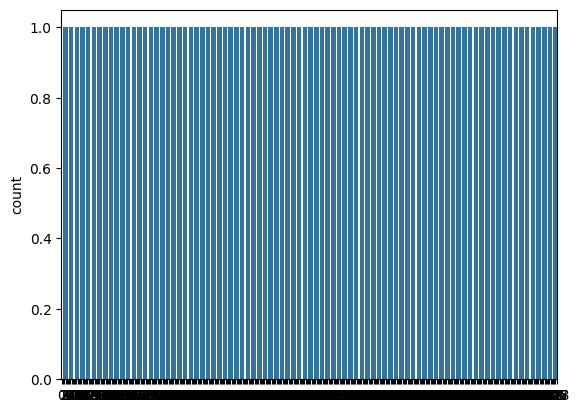

In [16]:
sns.countplot(df['Year'])

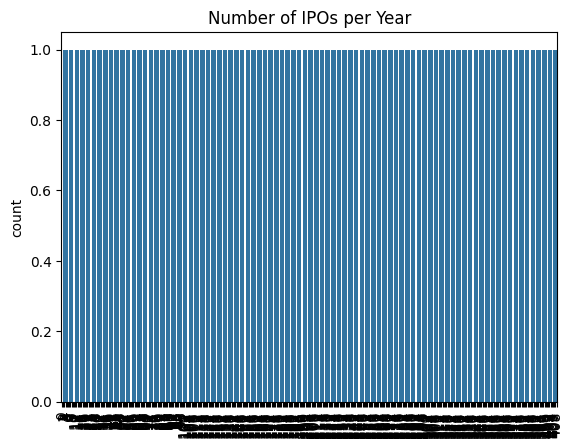

In [17]:
sns.countplot(df['Year'])
plt.title("Number of IPOs per Year")
plt.xticks(rotation=90)
plt.show()


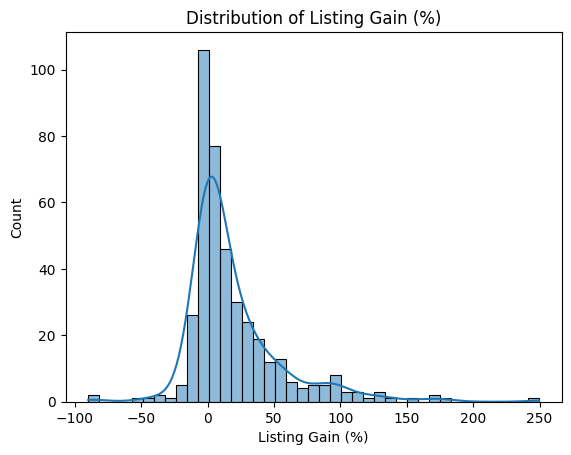

In [18]:
sns.histplot(df['Listing Gain (%)'], kde=True)
plt.title("Distribution of Listing Gain (%)")
plt.show()


In [ ]:
df.head()

In [1]:
print("Hello")

Hello


In [2]:
df.head()

NameError: name 'df' is not defined

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../data/raw/IPO_correct.csv")

In [5]:
df.head()

,IPO Name,Issue Open Date,Issue Close Date,Listing Date,Listing Exchange,Issue Price (Rs),Listing Price (Rs),Listing Gain (%),GMP,Retail Subscription,NII Subscription,QIB Subscription,Issue Size (Rs.cr),Revenue (Rs),Profit (Rs),EPS,Promoter Holding (%),Lead Manager,Label
0,Narayana Hrudayalaya Ltd. IPO,12/17/2015,12/21/2015,1/6/2016,"BSE, NSE",250,291.0,16.40,41.0,1.89,3.62,24.43,613.08,1373.19,-12.11,Negative,35.09,Axis Bank,NaN
1,Alkem Laboratories Ltd. IPO,12/8/2015,12/10/2015,12/23/2015,"BSE, NSE",1050,1380.0,31.43,330.0,4.24,61.28,63.56,"1,347.76",3964.2,460.75,38.54,53.8,Axis Capital,NaN
2,Dr.Lal PathLabs Ltd. IPO,12/8/2015,12/10/2015,12/23/2015,"BSE, NSE",550,720.0,30.91,170.0,3.17,129.96,57.19,631.91,660,94,11.48,58.7,Citigroup Global,NaN
3,S H Kelkar & Co.Ltd. IPO,10/28/2015,10/30/2015,11/16/2015,"BSE, NSE",180,222.0,23.33,42.0,1.98,87.38,25.55,508.17,832.41,63.88,5.34,71.72,JM Financial,NaN
4,InterGlobe Aviation Ltd. IPO,10/27/2015,10/29/2015,11/10/2015,"BSE, NSE",765,856.0,11.90,91.0,0.92,3.57,17.8,"3,017.14",13924.47,1295.58,NaN,85.9,Barclays Securities,NaN


In [6]:
df = pd.read_csv("../data/processed/fe_dataset1.csv")

In [7]:
df.head()

,IPO Name,Issue Open Date,Issue Close Date,Listing Date,Listing Exchange,Issue Price (Rs),Listing Price (Rs),Listing Gain (%),GMP,Retail Subscription,...,Lead Manager,Label,upper_price,lower_price,no_of_shares_cr,Year,IPO_Duration,Price_Band_Width,log_Issue_Size,Sub_Strength
0,Narayana Hrudayalaya Ltd. IPO,2015-12-17,2015-12-21,2016-01-06,"BSE, NSE",250,291.0,16.40,41.0,1.89,...,Axis Bank,0.0,0,0,0,2015,4,0,6.420125,13.679
1,Alkem Laboratories Ltd. IPO,2015-12-08,2015-12-10,2015-12-23,"BSE, NSE",1050,1380.0,31.43,330.0,4.24,...,Axis Capital,0.0,0,0,0,2015,2,0,0.000000,51.012
2,Dr.Lal PathLabs Ltd. IPO,2015-12-08,2015-12-10,2015-12-23,"BSE, NSE",550,720.0,30.91,170.0,3.17,...,Citigroup Global,0.0,0,0,0,2015,2,0,6.450328,68.217
3,S H Kelkar & Co.Ltd. IPO,2015-10-28,2015-10-30,2015-11-16,"BSE, NSE",180,222.0,23.33,42.0,1.98,...,JM Financial,0.0,0,0,0,2015,2,0,6.232782,39.385
4,InterGlobe Aviation Ltd. IPO,2015-10-27,2015-10-29,2015-11-10,"BSE, NSE",765,856.0,11.90,91.0,0.92,...,Barclays Securities,0.0,0,0,0,2015,2,0,0.000000,10.155


In [8]:
df.shape

(409, 27)